Creating Vasicek Rates path simulations open formula

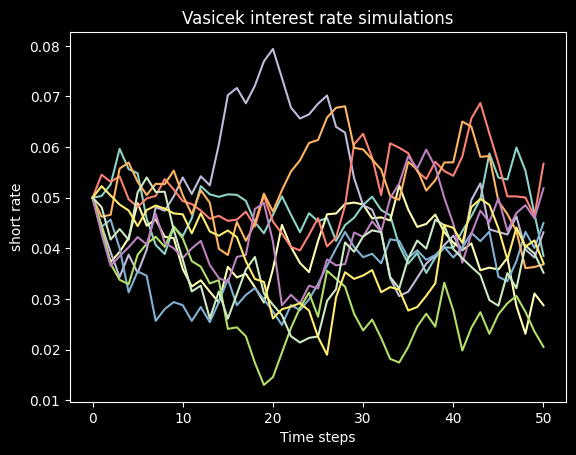

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def vasicek_paths (r0, kappa, theta, sigma, T, steps, n_paths):
    dt= T/steps
    rates = np.zeros((n_paths, steps+1))
    rates[:,0]= r0

    for t in range(steps):
        z=np.random.normal(size=n_paths)
        dr = kappa*(theta-rates[:,t])*dt+sigma*np.sqrt(dt)*z
        rates[:,t+1]=rates[:,t]+dr

    return rates

paths = vasicek_paths(r0=0.05, kappa=0.3, theta=0.04, sigma=0.01,  T=10, steps=50, n_paths=10)

plt.plot(paths[:20].T)
plt.title("Vasicek interest rate simulations")
plt.xlabel("Time steps")
plt.ylabel("short rate")
plt.style.use('dark_background')
plt.show()

Vasicek closed form vs MC simulation for Zero Bond Pricing

In [7]:
def vasicek_zero_bond_pricing(r, kappa, theta, sigma, T):
    B=(1-np.exp(-kappa*T))/kappa
    A=np.exp(((B-T)*(kappa**2*theta-sigma**2/2))/(kappa**2)-(sigma**2 * B**2) / (4*kappa))
    return A*np.exp(-B*r)

def monte_carlo_zero(r0, kappa, theta, sigma, T, steps, n_paths):
    paths=vasicek_paths(r0, kappa, theta, sigma, T, steps, n_paths)
    dt = T/steps
    discount_factors=np.exp(-np.sum(paths[:,:-1]*dt, axis=1))
    return np.mean(discount_factors)

r0=0.05
kappa=0.3
theta=0.04
sigma=0.01
T=5

analytic=vasicek_zero_bond_pricing(r0, kappa, theta, sigma, T)
mc=monte_carlo_zero(r0, kappa, theta, sigma, T, 5_000, 50_000)

print("Analytical price: ", analytic)
print("Montecarlo: ", mc)

Analytical price:  0.7984241132574306
Montecarlo:  0.798563296494487


Yield curve computation Vasicek vs MC

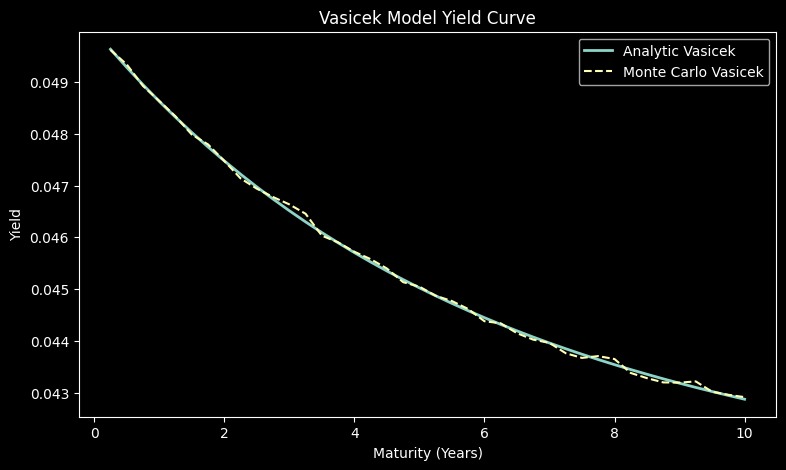

In [10]:
maturities = np.linspace(0.25, 10, 40)  # avoid T = 0

analytic_prices = np.array([
    vasicek_zero_bond_pricing(r0, kappa, theta, sigma, T)
    for T in maturities
])

mc_prices = np.array([
    monte_carlo_zero(r0, kappa, theta, sigma, T, 2000, 20000)
    for T in maturities
])

# Numerical safety clamp
analytic_prices = np.clip(analytic_prices, 1e-10, 1)
mc_prices = np.clip(mc_prices, 1e-10, 1)

analytic_yields = -np.log(analytic_prices) / maturities
mc_yields = -np.log(mc_prices) / maturities


plt.figure(figsize=(9,5))
plt.plot(maturities, analytic_yields, label="Analytic Vasicek", linewidth=2)
plt.plot(maturities, mc_yields, linestyle="--", label="Monte Carlo Vasicek")

plt.title("Vasicek Model Yield Curve")
plt.xlabel("Maturity (Years)")
plt.ylabel("Yield")
plt.legend()
plt.show()